In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x= dataset.iloc[:,[3,4]].values


138
Estimated number of clusters: 138


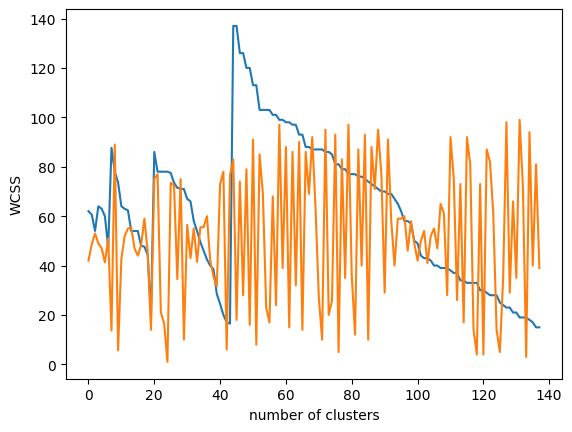

In [12]:
from sklearn.cluster import MeanShift


ms = MeanShift(bandwidth=2).fit(x)
cluster_centers = ms.cluster_centers_
labels = ms.labels_
n_clusters = len(cluster_centers)
print(n_clusters)
print("Estimated number of clusters: %d" % n_clusters)


plt.plot(range(0,138),cluster_centers)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from itertools import cycle
from sklearn import metrics 
 
p = ms.predict(x)
print(p)

[137 136  42  43 135  43  42 134 133 132  19 131  19  41  19  41 130 129
 128 127 126  40 125  40 124 122  39 123  39 121 120 119 118 115 117 116
 114 113 112 111  38 110  38 108 109 107 105 106  37  37 104  36 102  36
  18 103 101  18   6  18  35  35   6  17   6  17   6  16  17  16  34 100
  99  34  14   2   2  14   2  33   2  13  33  15  13  14  98  32  96  97
  32   5   1   5   5  11   1   1   0   1   0   4  95  12  12   0   3   4
  10   4  11  12  10   4   3   3  31  94  31  30  30  93  92  91  90  89
  27  88  29  28  29  28  27  87   9  86   9  26  85  26   9  84  83  82
  81  79  80  25  22   8  23   8  22  21  23   8  24  21  24  25  78  77
  76  75  74  20  73  72  70  69   7  20  71  68   7  66   7  67  65  64
  63  62  61  60  59  58  57  56  55  52  54  53  51  50  49  48  47  46
  45  44]


In [15]:
supervised = pd.DataFrame(dataset)
supervised['Cluster_Group'] = p
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,137
1,2,Male,21,15,81,136
2,3,Female,20,16,6,42
3,4,Female,23,16,77,43
4,5,Female,31,17,40,135
...,...,...,...,...,...,...
195,196,Female,35,120,79,48
196,197,Female,45,126,28,47
197,198,Male,32,126,74,46
198,199,Male,32,137,18,45


/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


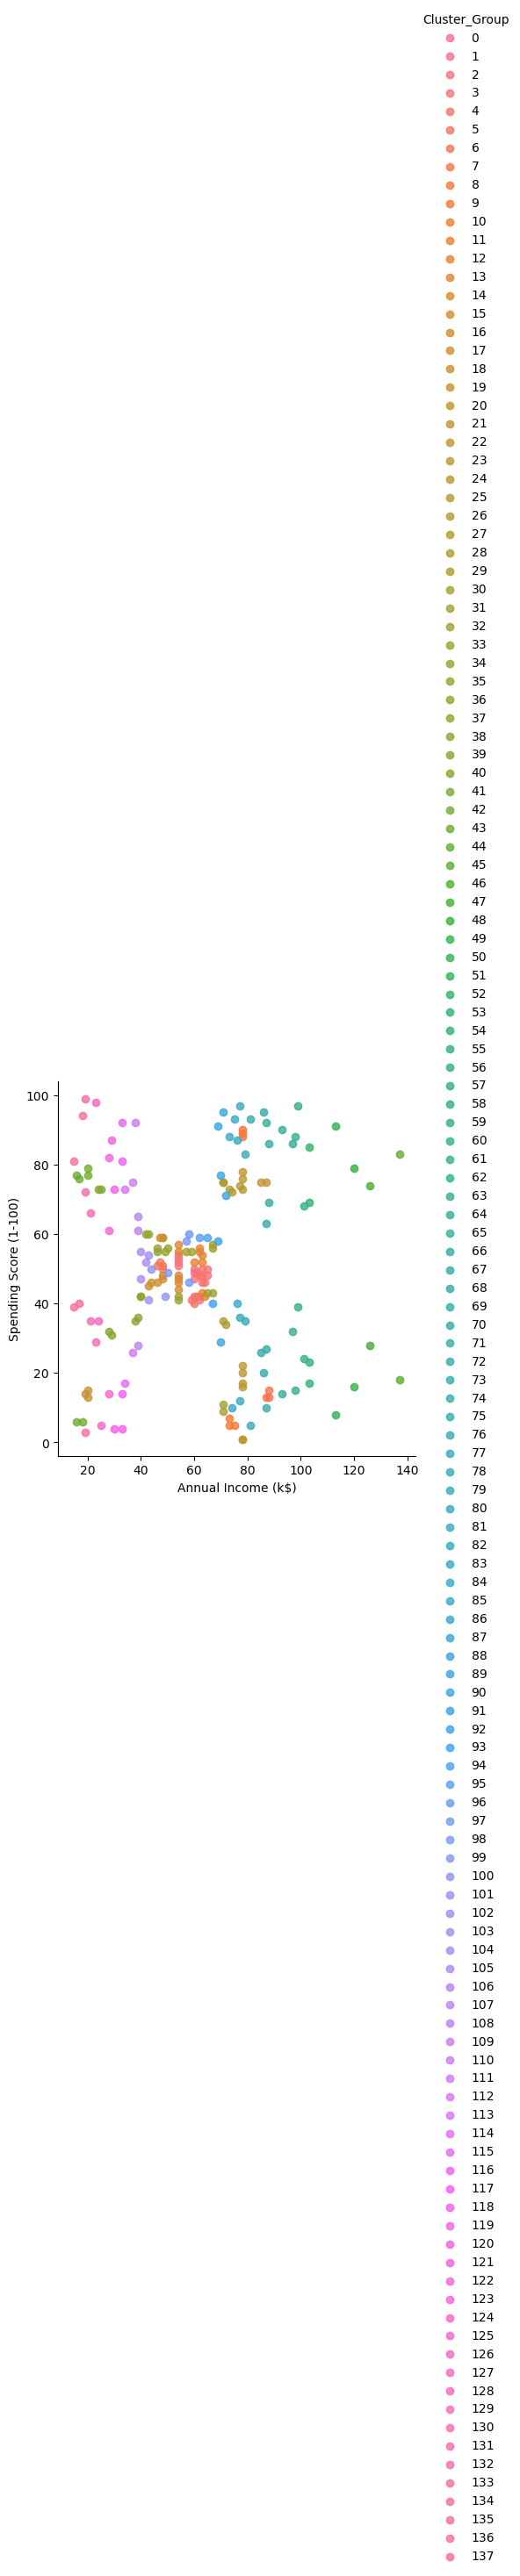

In [18]:
import seaborn as sns
facet = sns.lmplot(data = supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg = False,legend = True,legend_out = True)

In [17]:
%pip install seaborn